<a href="https://colab.research.google.com/github/juliana-sn/alura_python_data_science/blob/main/pandas/ConhecendoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso: Pandas - conhecendo a biblioteca

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

In [3]:
pd.read_csv(url, sep=';')
# importando o arquivo através da função read_csv do pandas, ela tem como parâmetro padrão o separator como ',', mas para o caso desse dataset usamos ';'

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [4]:
dados = pd.read_csv(url, sep=';')

In [5]:
dados.head()
# para ler as primeiras linhas da tabela, podemos também passar como parâmetro a quantidade desejada

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [6]:
dados.tail()
# para ler as últimas linhas da tabela, também podemos passar quantidade como parâmetro

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [7]:
type(dados)
# Podemos ver que essa variável dados é uma estrutura de dados chamada DataFrame

pandas.core.frame.DataFrame

Extra: Diferentes formas de dados

O Pandas fornece diversas funções para importar e exportar dados em diferentes formatos. As principais para importar são as seguintes:


*   read_csv
*   read_excel
*   read_json
*   read_html
*   read_sql



## Características gerais da base de dados

In [8]:
dados.shape

(32960, 9)

In [9]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [11]:
dados['Tipo']
# Retornou uma outra estrutura de dados do Pandas chamada Series, elas são mais simples pois é composta apenas por índices e valores.

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento
...,...
32955,Quitinete
32956,Apartamento
32957,Apartamento
32958,Apartamento


In [12]:
dados[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


## Análise Exploratória de Dados (EDA)

Qual o valor médio de aluguel por tipo de imóvel?

In [13]:
# Para agrupar dados, existe um método do Pandas chamando groupby() que realiza agrupamento por alguma coluna específica do dataframe
dados.groupby('Tipo').mean(numeric_only=True)

## Se estiver usando a versão 1 da biblioteca Pandas, automaticamente esse método de agregração será aplicado unicamente nas colunas númericas.
## No entanto, se estiver usando da versão 2 em diante, o comportamento não será o mesmo. Por isso, iremos utilizar o parâmetro numeric_only=True

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [14]:
# Selecionando apenas as colunas relevantes para a pergunta
dados.groupby('Tipo')['Valor'].mean(numeric_only=True)


,Valor
Tipo,
Apartamento,4744.614648
Box/Garagem,1899.756098
Casa,6793.454922
Casa Comercial,14478.264151
Casa de Condomínio,11952.061245
Casa de Vila,1574.369478
Chácara,4900.000000
Conjunto Comercial/Sala,14715.045521
Flat,4546.189076


In [15]:
# Para melhorar essa visualização, podemos transformar em um dataFrame e ordenar por valor
dados.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

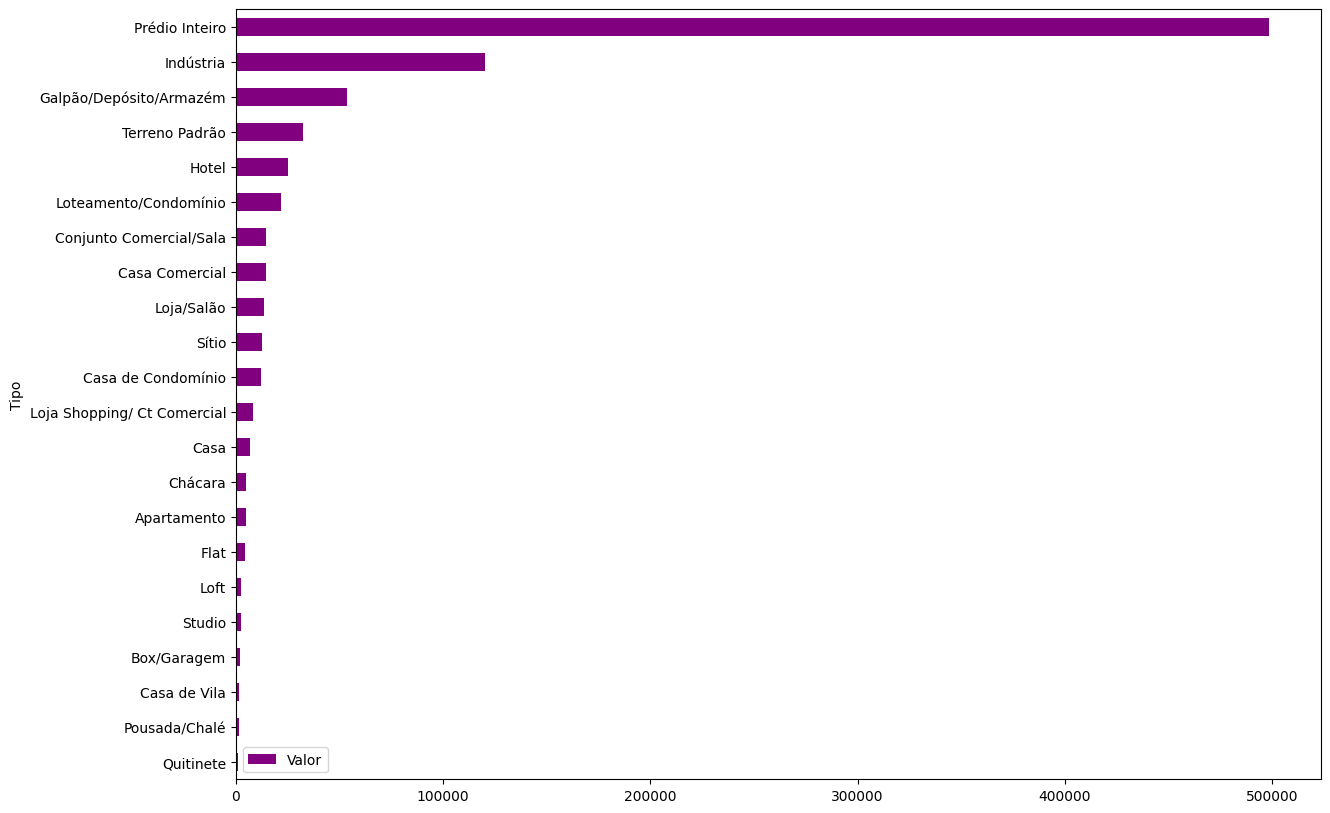

In [16]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values('Valor')

# Plotando um gráfico
df_preco_tipo.plot(kind='barh', figsize=(14,10), color='purple')
# primeiro definimos o tipo de gráfico (nesse caso, de barras horizontal), tamanho e cor

Para saber mais: Entendendo groupby
O método groupby do Pandas permite agrupar e resumir dados de um DataFrame, com base em um ou mais critérios. Esses critérios podem ser variáveis numéricas ou categóricas, como colunas ou índices do DataFrame.

A ideia por trás do groupby é dividir os dados em grupos com base nos critérios selecionados e, em seguida, aplicar uma operação a esses grupos. Essa operação pode ser uma função de agregação, como soma, média, contagem, desvio padrão, entre outras, ou mesmo uma operação personalizada definida pela pessoa usuária.

Esse método possui diversos parâmetros, alguns deles são:

by: esse é o parâmetro mais comum e é usado para especificar a coluna ou colunas que queremos agrupar. Como argumento dele, podemos passar o nome de uma coluna ou uma lista de nomes de colunas;

axis: utilizamos esse parâmetro para especificar o eixo ao longo do qual queremos agrupar. O valor padrão dele é 0, o que significa que as linhas serão agrupadas. Se quisermos agrupar as colunas, devemos definir esse parâmetro como 1;

sort: esse parâmetro é um booleano (True ou False) que indica se os grupos devem ser ordenados pelo valor da coluna de agrupamento. O valor padrão é True;

dropna: utilizamos esse parâmetro para controlar se os valores ausentes (NaN) serão excluídos ou não durante o processo de agrupamento. O valor padrão é True.


Podemos também usar o método groupby para agrupar os dados por múltiplas colunas. Por exemplo, vamos agrupar pelo tipo do animal e também pela cor e realizar a soma da coluna "Quantidade":


```
# df = pd.DataFrame({
   'Animal': ['Cachorro', 'Gato', 'Elefante', 'Cachorro', 'Gato', 'Elefante'],
   'Cor': ['Preto', 'Branco', 'Cinza', 'Marrom', 'Preto', 'Marrom'],
   'Quantidade': [2, 3, 1, 4, 2, 2]
})


df.groupby(['Animal', 'Cor'])[['Quantidade']].sum()
```

Removendo os imóveis comerciais

In [17]:
# Método unique para verificar as variáveis únicas
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [18]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Box/Garagem', 'Loja Shopping/ Ct Comercial',
                      'Chácara', 'Loteamento/Condomínio',
                      'Sítio', 'Pousada/Chalé',
                      'Hotel', 'Indústria']

In [19]:
# Método query, esse método nos permite selecionar linhas específicas de um dataframe com base em uma condição
dados.query('@imoveis_comerciais in Tipo')
# para passar uma variável no query, precisamos adicionar o @

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [20]:
# Para retornar apenas os que não fazem parte dos comerciais
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [21]:
df = dados.query('@imoveis_comerciais not in Tipo')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


<Axes: ylabel='Tipo'>

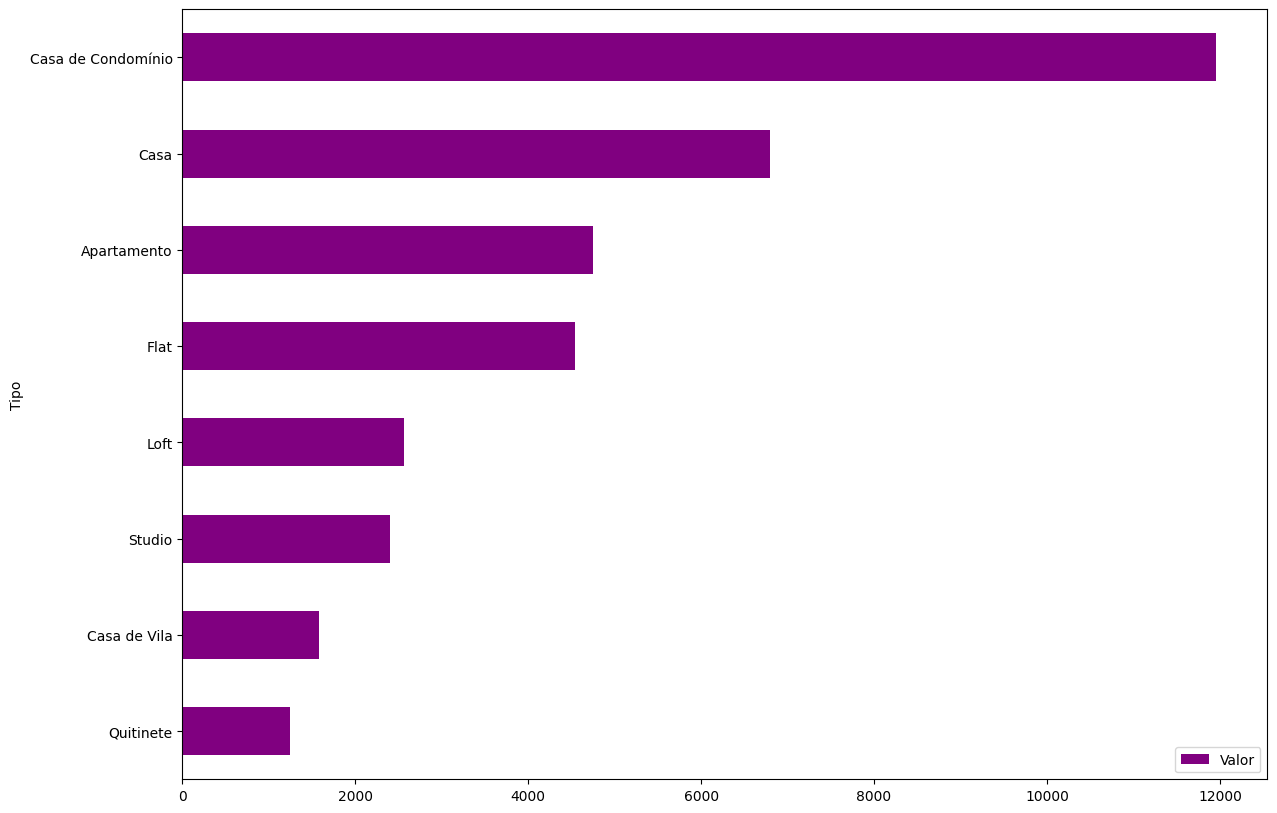

In [22]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values('Valor')

# Plotando um gráfico
df_preco_tipo.plot(kind='barh', figsize=(14,10), color='purple')

Exercício - Selecione os imóveis que possuem uma ou mais suites

In [23]:
df_suites = dados.query('Suites > 0')
df_suites.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0


Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [24]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [25]:
df.Tipo.value_counts(normalize=True)
# verificando a quantidade dos valores, e com o parâmetro normalize True ele retorna o percentual

,proportion
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


In [26]:
# Convertendo uma Series para dataframe
df.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: xlabel='Percentual', ylabel='Tipo'>

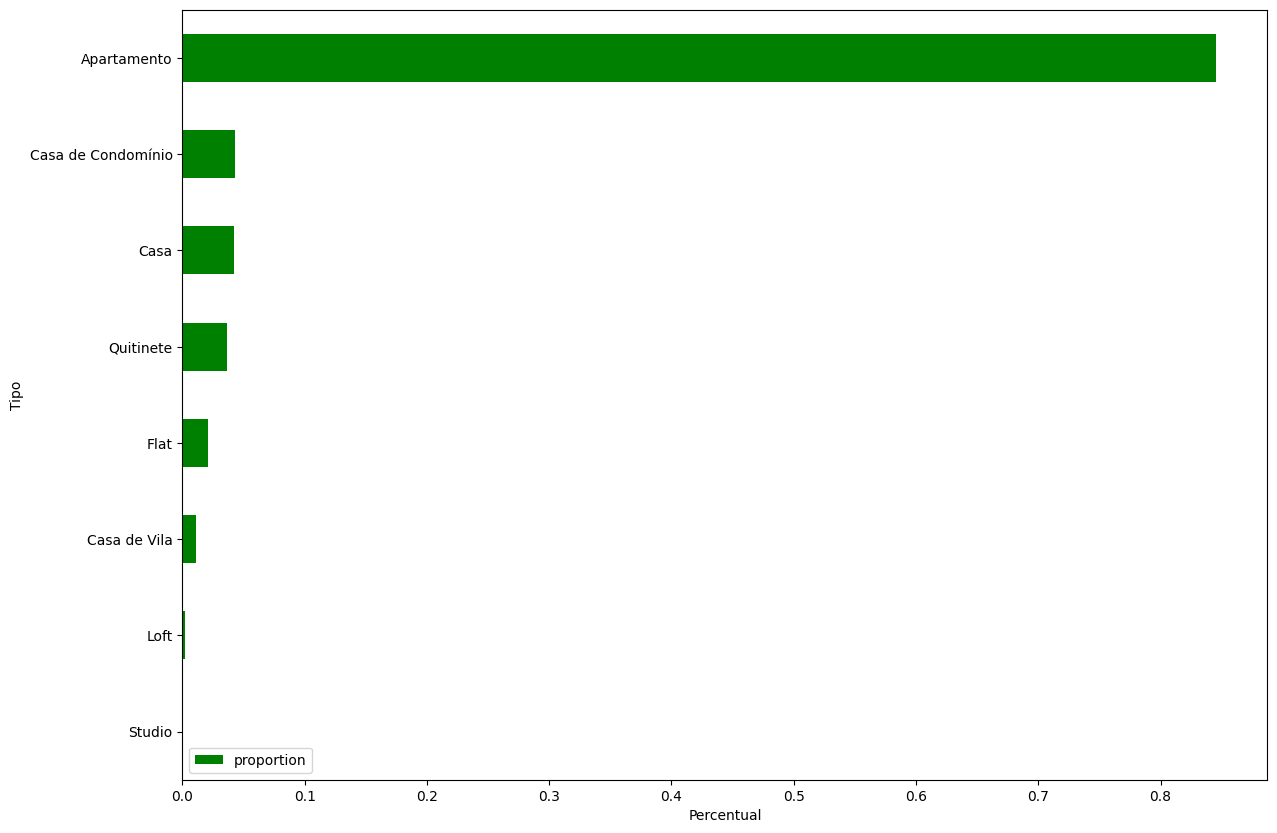

In [27]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')

df_percentual_tipo.plot(kind='barh', figsize=(14,10), color='green', xlabel='Percentual', ylabel='Tipo')

Selecionando apenas os imóveis do tipo apartamento

In [28]:
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [29]:
df = df.query('Tipo == "Apartamento"')

Para saber mais: alterando os nomes de colunas


```
# df_exemplo.rename(columns={'Tipo': 'Percentuais'}, inplace=True)
```



## Tratando e filtrando os dados

Lidando com dados nulos

In [30]:
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [31]:
df.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,7
Condominio,745
IPTU,5472


In [32]:
# Agora que identificamos que todas as colunas que possuem dados nulos são numéricas, vamos adotar uma abordagem mais simples, substituir os nulos por 0.
## Vale ressaltar que essa nem sempre é a melhor forma de resolver, sempre depende do projeto

# Vamos usar o método fillna para substituir os valores nulos, como parâmetro passsamos o valor que queremos usar no lugar
df = df.fillna(0)
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0


In [33]:
# Verificando se todos os valores nulos foram tratados
df.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0


Para saber mais: Tratar dados nulos em uma base de dados é muito importante porque esses dados faltantes podem interferir diretamente na qualidade das análises e nos resultados obtidos. Quando existem dados nulos em um conjunto de dados, podem ocorrer problemas como viés, redução da acurácia e imprecisão nas informações obtidas.

Além disso, algumas análises e modelos estatísticos não são capazes de lidar com a presença de dados faltantes. Por isso, o tratamento dos dados nulos é fundamental para garantir a confiabilidade e a precisão das análises e decisões tomadas a partir desses dados.

Existem diversas formas de tratar dados nulos com o Pandas. Algumas das principais formas são:


*   Remover os dados nulos: É possível remover as linhas ou colunas que possuem valores nulos utilizando o método dropna() . Esse método remove todas as linhas ou colunas que possuem pelo menos um valor nulo.
*   Preencher os dados nulos: Utilizando o método fillna(), podemos preencher os valores nulos com um valor específico. Além disso, também é possível utilizar argumentos específicos do método fillna() como o method=”ffill” ou method=”bfill” para preencher os valores nulos com o valor anterior ou posterior, respectivamente.
* Interpolar os dados nulos: É possível utilizar o método interpolate() para preencher os valores nulos com valores interpolados, ou seja, valores calculados a partir dos valores vizinhos.

É importante escolher a melhor forma de tratar os dados nulos de acordo com a situação específica e o objetivo da análise de dados.

Removendo registros

In [34]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [35]:
df.query('Valor == 0 | Condominio == 0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [36]:
registros_a_remover = df.query('Valor == 0 | Condominio == 0').index

In [37]:
# Método drop para remover as linhas que possuem os registros a remover
df.drop(registros_a_remover, axis=0, inplace=True)
# Axis = 0 -> remover linhas
# Axis = 1 -> remover colunas
# Inplace para que as alterações sejam aplicadas no dataframe sem fazer uma nova atribuição

In [38]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [39]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [40]:
# Vamos remover também a coluna Tipo, pois só tem apartamentos no dataframe
df.drop('Tipo', axis=1, inplace=True)

In [41]:
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


Aplicando filtros

1. Apartamentos com 1 quarto e aluguel < R$1.200


In [42]:
# Poderíamos fazer com query, mas vamos fazer agora de uma forma mais "manual"
df['Quartos'] == 1

,Quartos
3,True
4,True
6,False
11,False
12,False
...,...
32951,False
32953,False
32956,False
32957,False


In [43]:
selecao1 = df['Quartos'] == 1
df[selecao1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [45]:
selecao2 = df['Valor'] < 1200
df[selecao2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [ ]:
# Juntando as seleções
selecao_final = (selecao1) & (selecao2)
filtro1 = df[selecao_final]

2. Apartamentos que possuem pelo menos 2 quartos, aluguel menor que 3.000 e área maior que 70m²

In [46]:
selecao = (df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)

In [47]:
filtro2 = df[selecao]
filtro2

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


Salvando os dados com o método to_csv

In [48]:
df.to_csv('dados_apartamentos.csv')

In [49]:
pd.read_csv('dados_apartamentos.csv')
# Quando salvamos um arquivo em formato csv, ele automaticamente gera novos índices ordenados para cada uma das linhas e os índices antigos vão para outra coluna a 'Unmamed:0'
# Para resolvermos isso temos que passar o parâmetro index=False

,Unnamed: 0,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,32953,Méier,2,0,0,70,900.0,490.0,48.0
18777,32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [50]:
df.to_csv('dados_apartamentos.csv', index=False)

In [51]:
pd.read_csv('dados_apartamentos.csv')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [52]:
# Vamos manter o padrão do arquivo de dataset inicial, separando os valores com ';'
df.to_csv('dados_apartamentos.csv', index=False, sep=';')

In [53]:
pd.read_csv('dados_apartamentos.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Criando colunas numéricas
Colunas a serem criadas:
* Valor por mês: gastos mensais de cada imóvel, incluindo aluguel e condomínio
* Valor por ano: IPTU mais 12 meses de aluguel e condomínio

----------------------------------------

Nesse momento vamos importar novamente toda a base de dados incluindo todos os tipos de imóveis

In [54]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

dados = pd.read_csv(url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [55]:
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
# Criando a nova coluna

dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [57]:
dados['Valor_por_ano'] = dados['Valor_por_mes'] * 12 + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

Colunas a seres criadas:

* Descrição: deve possuir as sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas na garagem
* Possui_suite: essa deve ser uma coluna que informe apenas se o imóvel possui ou não suítes, sem se importar com a quantidade

In [58]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + \
                      dados['Quartos'] + ' quarto(s) ' + \
                      'e ' + dados['Vagas'] + ' vaga(s) de garagem.'

dados.head()

TypeError: can only concatenate str (not "int") to str

In [59]:
# Erro: Não podemos contatenar int com string
## Precisamos converter as colunas numéricas para string
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + \
                      dados['Quartos'].astype(str) + ' quarto(s) ' + \
                      'e ' + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'


dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...


In [60]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')
# Usamos o método apply utilizado para aplicar uma determinada função em um conjunto específico de dados, e a função utilizada é do tipo lambda

dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...,Não


In [61]:
dados.to_csv('dados_completos_dev.csv', index=False, sep=';')